<a href="https://colab.research.google.com/github/DouglasDeAlmeida/Arquivos-Proj-Saude/blob/main/Diadema's_HealthcareData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNOS: 

CARLOS DINART SANTOS DE MORAIS JUNIOR,


DOUGLAS SILVA DE ALMEIDA,


JOAO LUIZ DE ANDRADE BOFFI,


LUCAS DO LAGO MONIZ DA SILVA


  Através deste projeto apresentamos soluções com bases nos dados extraidos de um site governamental e extraimos a seguimentação da Saúde, apresentamos ao decorrer uma série de análises a cerca de areas distintas da Saúde e também uma visualização ampla sobre a esta função governamental. Utilizamos a linguagem de programação python para  execução deste projeto e o executamos através do Google Coolab*, dentro deste aspecto, fizemos uso de bibliotecas como pandas, numpy, matplotlib.ptplot, arcgis e seaborn.

####TODOS OS ARQUIVOS (CSV, EXCEL) UTILIZADOS NESTE DOCUMENTO ESTÃO DISPONIVEIS EM : https://github.com/DouglasDeAlmeida/Arquivos-Proj-Saude

# DESPESAS ANUAIS

Como inicio, vamos fazer a importação das bibliotecas de assistencia para este projeto conforme codigo abaixo.  Após a importação, subimos o arquivo csv que irá ser tratado



In [ ]:
!pip install selenium

     |████████████████████████████████| 911kB 7.5MB/s 


Como inicio, vamos fazer a importação das bibliotecas de assistencia para este projeto conforme codigo abaixo.  Após a importação, subimos o arquivo csv que irá ser tratado



In [ ]:
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


  Utilizamos esta função a seguir para baixar os dados e extrair o csv.


In [ ]:
def obter_driver():
    """" Foi utilizado para navegador o Chrome Veresao 86, e seus respectivo Driver instalado no python,
     criado o driver como biblioteca e salvo na pasta "Chrome Driver" e classe ("chromedriver.exe")
     """
    driver = webdriver.Chrome(executable_path="chromedriver.exe")
    return driver
def acesso_site(driver):
    for i in range(14,21):
        driver.get("https://transparencia.tce.sp.gov.br/municipio/diadema/20{}".format(i))
        driver.find_element_by_xpath(
            "/html/body/div/div/div/div[3]/section/div/div/div/div[2]/div/div[2]/div/table/tbody/tr[2]/td[1]/a").click()
        sleep(7)
def extrair():
    for i in range(14,21):
        zip = zipfile.ZipFile(r'C:\Users\PICHAU\Downloads\despesas-diadema-20{}.zip'.format(i))
        zip.extractall()
def main():
    driver = obter_driver()
    acesso_site(driver)
    extrair()

  Utilizamos a função abaixo para filtrar as despesas.

In [ ]:
def des_total(Data):#função para criar a coluna de despesas
  try:
    Data.insert(12, 'despesa_total', value=None)
  except:
    pass
  
  for rows in range(len(Data['tp_despesa'])):
    if Data['tp_despesa'][rows] == 'Valor pago' or Data['tp_despesa'][rows] == 'Valor Liquidado':
      Data['despesa_total'][rows] = 0

    elif Data['tp_despesa'][rows] == 'Anulação':
      Data['despesa_total'][rows] = Data['vl_despesa'][rows] *-1

    elif Data['tp_despesa'][rows] == 'Empenhado':
      Data['despesa_total'][rows] = Data['vl_despesa'][rows] 
    elif Data['tp_despesa'][rows] == 'Reforço':
      Data['despesa_total'][rows] = Data['vl_despesa'][rows] 



Através da função a seguir, conseguimos guardar as variáveis em um dicionário.


In [ ]:
#cria um dicionario que vai armazenar as variaveis
variaveis = {}
for i in range(14,21):
  #cria os nomes de acordo com o ano, e já define o valor para a variavel
  variaveis["des_20%s" %i] = pd.read_excel('/content/drive/My Drive/Data Science/DataAcquisition/Healthcare Dataset/despesas-diadema-20{}.xlsx'.format(i))
  #EX: A planilha de 2014 vai estar na variavel des_2014.


A função abaxio é utilizada para adicionar a coluna despesa total.


In [ ]:
for s2 in range(14,21):
  #adiciona de fato a coluna 'despesa total' em cada variavel
  des_total(variaveis["des_20%s" %s2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [ ]:
variaveis['des_2014']['ano_exercicio'].iloc[0]

2014

In [ ]:
variaveis['des_2014']#teste para ver se funcionou

Nas funções abaixo limpamos os dados indesejados e atribuimos as novas variaveis a colina de despesas.

In [ ]:
#aqui é feita a limpeza de todas as variaveis
desSaude = {}
for s3 in range(14,21):
  cleanDes=variaveis["des_20%s" %s3][variaveis["des_20%s" %s3]['ds_funcao_governo'].isin(['SAÚDE'])]
  desSaude['desSaude%s' %s3]=pd.pivot_table(cleanDes, values = 'despesa_total', index=["ds_funcao_governo", "ds_subfuncao_governo"], aggfunc = np.sum)

In [ ]:
#atribuindo a coluna das despesas à novas variaveis
col = {}
namecol = {}
for s4 in range(14,21):
  renomear = {'despesa_total': 'despesa_total{}'.format(s4)}
  col['col20%s' %s4] = desSaude['desSaude{}'.format(s4)]['despesa_total']
  namecol['col20%s' %s4] = desSaude['desSaude{}'.format(s4)]['despesa_total'].to_frame().rename(columns = renomear)#uma copia do dict acima, porém, armazenando os dados em um DataFrame e alterando os nomes da despesa

A seguir a concatenação das colunas e visualização das mesmas.

In [ ]:
#concatenando as colunas
anualSubfuncao = pd.concat([namecol['col2014'], namecol['col2015'], namecol['col2016'], namecol['col2017'], namecol['col2018'], namecol['col2019'], namecol['col2020']], axis=1).fillna(0) 
anualSubfuncao


despesa_total14  ...  despesa_total20
ds_funcao_governo ds_subfuncao_governo                                    ...                 
SAÚDE             ADMINISTRAÇÃO GERAL                       2.281676e+07  ...     2.101745e+07
                  ASSISTÊNCIA HOSPITALAR E AMBULATORIAL     1.748413e+08  ...     2.168333e+08
                  ATENÇÃO BÁSICA                            1.159211e+08  ...     1.417116e+08
                  COMUNICAÇÃO SOCIAL                        3.458068e+04  ...     1.725000e+03
                  SUPORTE PROFILÁTICO E TERAPÊUTICO         3.977356e+06  ...     0.000000e+00
                  VIGILÂNCIA EPIDEMIOLÓGICA                 5.861817e+06  ...     7.680371e+06

[6 rows x 7 columns]

Multiplicamos através do número índice para chegar a despesa atualizada com a inflação.

In [ ]:
anual = [sum(col['col2014']),sum(col['col2015']),sum(col['col2016']),sum(col['col2017']),sum(col['col2018']),sum(col['col2019']),sum(col['col2020']),]
anual1 = np.array(anual)/ 1000000


E a seguir, plotamos as informações conforme os dados trabalhados. Utilizamos para a vizualização a Despesa nominal e Despesa atualizada, através da análise realizada, concluimos que ao passar dos anos a Despesa nominal aumentou em valores absolutos. Entretanto, ao considerar a inflação do periodo, vemos que o orçamento para a saúde na verdade reduziu.

In [ ]:
#multiplicando pelo numero índice para pegar a despesa atualizada com a inflação
anualAtualizado = [anual[0]*1.5581, anual[1]*1.4077, anual[2]*1.3138, anual[3]*1.3193, anual[4]*1.2319, anual[5]*1.1440, anual[6]]

anualAtualizado1 = np.array(anualAtualizado) / 1000000


<function matplotlib.pyplot.show>

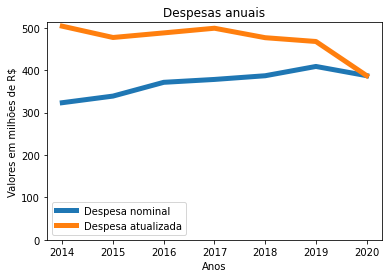

In [ ]:
anos=[2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.plot(anos, anual1, anos, anualAtualizado1, linewidth=5.0)

plt.legend(['Despesa nominal', 'Despesa atualizada'])
plt.title('Despesas anuais')
plt.xlabel('Anos')
plt.ylabel('Valores em milhões de R$')
plt.ylim(ymin=0)
plt.show

 De acordo com o gráfico e a análise realizada a cerca dos gastos públicos, é notório dizer que temos como padrão o gasto em Assistência Hospitalar e Ambulatorial como a fatia que mais recebe verba pública. 

 A assistencia hospitalar e ambulatorial destina-se a serviços de pronto atencimento, bem como farmácias e consumo/transporte de insumos.

 Por se tratarem de unidades de saúde com amplo atendimento é certo dizer que o posicionamento estratégico das unidades (como podemos ver nos gráficos mais abaixo) é realizado para cobrir toda a região municipal, descentralizando os hospitais fazendo com que cada bairro possua uma unidade de saúde próxima.

In [ ]:
#para chamar essa função utilizar a variavel anualSubFuncao e explicitar qual o ano que será selecionado
def despesa_SubFuncao(coluna):
  q1 = coluna.loc['SAÚDE','ADMINISTRAÇÃO GERAL']
  q2 = coluna.loc['SAÚDE','ASSISTÊNCIA HOSPITALAR E AMBULATORIAL']
  q3 = coluna.loc['SAÚDE','ATENÇÃO BÁSICA']
  q4 = coluna.loc['SAÚDE','COMUNICAÇÃO SOCIAL']
  q5 = coluna.loc['SAÚDE','SUPORTE PROFILÁTICO E TERAPÊUTICO']
  q6 = coluna.loc['SAÚDE','VIGILÂNCIA EPIDEMIOLÓGICA']
    
  plt.title('GASTOS POR SUBFUNÇÃO')# DE {}'.format(coluna['ano_exercicio'].iloc[0])

  labels = 'ADMINISTRAÇÃO GERAL', 'ASSISTÊNCIA HOSPITALAR E AMBULATORIAL	', 'ATENÇÃO BÁSICA	', 'COMUNICAÇÃO SOCIAL	', 'SUPORTE PROFILÁTICO E TERAPÊUTICO	', 'VIGILÂNCIA EPIDEMIOLÓGICA	'
  despesas = [q1,q2,q3,q4,q5,q6]
  explode = (0.3, 0.1, 0.1, 0.9,1.5,0.1)  

  plt.pie(despesas, explode=explode, labels=labels, autopct='%2.1f%%',
          shadow=False, startangle=90)
  plt.axis('equal')  
  plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



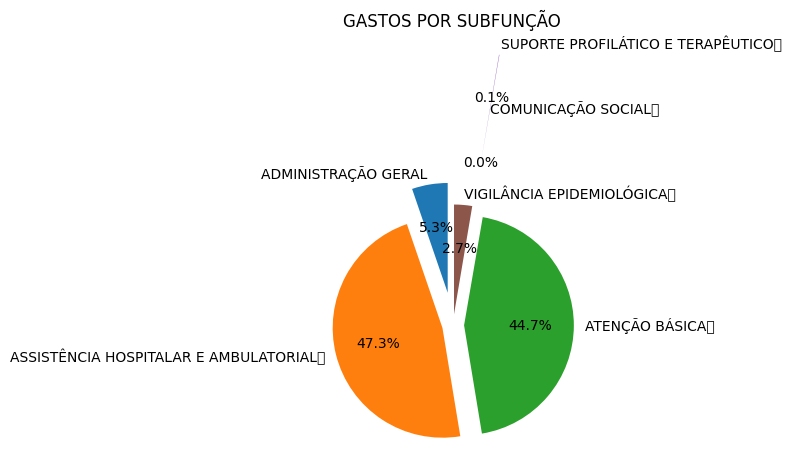

In [ ]:
despesa_SubFuncao(anualSubfuncao['despesa_total18'])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


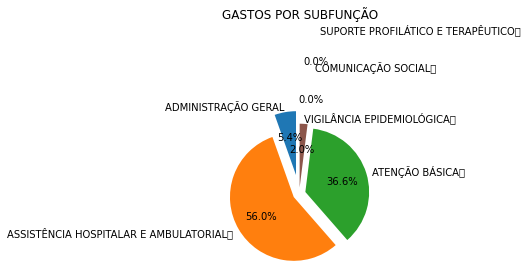

In [ ]:
despesa_SubFuncao(anualSubfuncao['despesa_total20'])

# ESTABELECIMENTOS DE SAÚDE


 Realizamos a seguir o levantamento dos dados geográficos em uma planilha de excel, bem como a mineração dos dados sobre cada unidade de saúde em sua devida clasificação. Ao realizar a mineração dos dados, foram constatadas dificuladades em localizar uma fonte de informações padronizadas, sendo assim, utilizamos uma lista de estabelecimentos extraida dos sites em apendice e realizamos o pareamento dos dados junto ao Google Maps, a fim de verificar e corrigir endereço e coordenada de cada unidade.

  Após a mineração, salvamos os dados em um arquivo .csv e realizamos o tratamento dos dados com bibliotecas geograficas, como conclusão deste processo, recebemos o mapeamento das unidades de saúde de acordo com suas classificações. 

  Realizamos a classificação por três unidades sendo elas, UBSs, CAPSs e Hospitais

  A vizualização dos dados apresentados pode servir também como meio de informação a um cidadão, sendo um sistema que poderia ser implementado em um site para localização de unidades de saúde, ferrarmenta esta não encontrada nos sites onde foram retiradas as informações. Vendo de outro angulo, os dados servem como indicadores de gastos públicos, onde somado a uma analise sobre as necessidades locais, tem grande potencial para uma proposta politica a cerca da area da saúde.

In [ ]:
!pip install geopandas
import geopandas as gpds
import folium

     |████████████████████████████████| 972kB 8.1MB/s 
     |████████████████████████████████| 14.8MB 249kB/s 
     |████████████████████████████████| 6.5MB 45.3MB/s 


###MAPEAMENTO DE UBS

In [ ]:
diadema = pd.read_csv('/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/diadema-csv.csv', sep=';')

diadema["endereco_e_cidade"] = diadema["Endereço"] + ", " + "Diadema, Brazil"

diadema["Coordenadas"] = gpds.tools.geocode(diadema["endereco_e_cidade"], provider = "arcgis", user_agent="Intro Geocode", timeout = 1  )["geometry"]


In [ ]:
diaUbs = folium.Map(tiles= 'CartoDB positron',location=[-23.68982935144979,-46.62304013921967], zoom_start=13, max_zoom = 14, min_zoom = 13)
tooltip = "Clique aqui"
for i in range(1,len(diadema)):
      folium.Marker(
        location= [diadema['Coordenadas'][i].y ,diadema['Coordenadas'][i].x],
        tooltip = tooltip,
        popup = diadema.iloc[i]['UBS'],
        icon = folium.Icon(color='red')
      ).add_to(diaUbs)
    
diaUbs

###MAPEAMENTO CAPS

In [ ]:
diademaCaps = pd.read_csv('/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Caps.csv', sep=';')[['Caps', 'Endereço']]
diademaCaps["endereco_e_cidade"] = diademaCaps["Endereço"] + ", " + "Diadema, Brazil"
diademaCaps["Coordenadas"] = gpds.tools.geocode(diademaCaps["endereco_e_cidade"], provider = "arcgis", user_agent="Intro Geocode", timeout = 1  )["geometry"]
diademaCaps


,Caps,Endereço,endereco_e_cidade,Coordenadas
0,CAPS Leste,"Av. Sete de Setembro, 2","Av. Sete de Setembro, 2, Diadema, Brazil",POINT (-46.62145 -23.69364)
1,Centro de Atenção Psicossocial - Adulto e Infa...,"R. Oriente Monti, 28","R. Oriente Monti, 28 , Diadema, Brazil",POINT (-46.62718 -23.69038)
2,Caps III Norte - Diadema,"R. das Macieiras, 124","R. das Macieiras, 124, Diadema, Brazil",POINT (-46.60268 -23.66586)
3,CAPS Sul,"R. Nelson Rodrigues, 191","R. Nelson Rodrigues, 191, Diadema, Brazil",POINT (-46.61784 -23.69264)


In [ ]:
diaCaps = folium.Map(tiles= 'CartoDB positron',location=[-23.68982935144979,-46.62304013921967], zoom_start=13, max_zoom = 14, min_zoom = 13)
tooltip = "Clique aqui"
for i in range(0,len(diademaCaps)):
      folium.Marker(
        location= [diademaCaps['Coordenadas'][i].y ,diademaCaps['Coordenadas'][i].x],
        tooltip = tooltip,
        popup = diademaCaps.iloc[i]['Caps'],
        icon = folium.Icon(color='lightblue')
      ).add_to(diaCaps)
    
diaCaps

###MAPEAMENTO HOSPITAIS

In [ ]:
diademaHosp = pd.read_csv('/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Excel Hospitais.csv', sep=';')[0:8]
diademaHosp['Número']=diademaHosp['Número'].astype(int)
diademaHosp["endereco_e_cidade"] = diademaHosp["Endereço"] + ", " + diademaHosp['Número'].astype(str) + ", " + "Diadema, Brazil"
diademaHosp["Coordenadas"] = gpds.tools.geocode(diademaHosp["endereco_e_cidade"], provider = "arcgis", user_agent="Intro Geocode", timeout = 1  )["geometry"]
diademaHosp

,Hospital,Coordenada,Endereço,Número,Telefone,Bairro,Horário de Funcionamento,CEP,endereco_e_cidade,Coordenadas
0,Hospital Estadual de Diadema,"-23.706661620570596, -46.60935773997724",Avenida José Bonifácio,1641,1.140569e+09,Conceição,24:00:00,09960-120,"Avenida José Bonifácio, 1641, Diadema, Brazil",POINT (-46.60975 -23.70703)
1,Hospital Perfecta Day,"-23.685389720216012, -46.627031449771415",Rua São Joaquim,57,1.140449e+09,Centro,00:00 – 00:00,09911-020,"Rua São Joaquim, 57, Diadema, Brazil",POINT (-46.62695 -23.68532)
2,Hospital São Lucas,"-23.665902373738888, -46.40349769614648",Rua São Jorge,98,1.121782e+09,Centro,24:00:00,09911-020,"Rua São Jorge, 98, Diadema, Brazil",POINT (-46.62666 -23.68601)
3,Hospital Municipal de Diadema,"-23.691628878429167, -46.586868463264295",Avenida Piraporinha,1682,1.140617e+09,Vila Nogueira,24:00:00,09951-030,"Avenida Piraporinha, 1682, Diadema, Brazil",POINT (-46.58714 -23.69163)
4,A G H Serviços Médicos LTDA,"-23.69099140, -46.62774280",Avenida Alda,1180,1.196370e+10,Centro,00:00 – 00:00,09910-170,"Avenida Alda, 1180, Diadema, Brazil",POINT (-46.62883 -23.69679)
5,Pronto Socorro Municipal de Diadema,"-23.68587677129178, -46.616927413537525",Rua Tiradentes,100,1.140438e+09,Centro,24:00:00,09911-190,"Rua Tiradentes, 100, Diadema, Brazil",POINT (-46.61656 -23.68650)
6,Hospital de Clínica,"23º39’47’S, 46º36’06W",Avenida Almiro Sena Ramos,1220,1.140722e+09,Taboão,24:00:00,09940-030,"Avenida Almiro Sena Ramos, 1220, Diadema, Brazil",POINT (-46.60168 -23.66313)
7,Santa Casa Misericórdia Diadema,"-23.68247886707628, -46.60647846750958",Rua Dois de Julho,465,1.140726e+09,Jardim Canhema,07:00 – 17:00,09941-540,"Rua Dois de Julho, 465, Diadema, Brazil",POINT (-46.60702 -23.68250)


In [ ]:
diaHosp = folium.Map(tiles= 'CartoDB positron',location=[-23.68982935144979,-46.62304013921967], zoom_start=13, max_zoom = 14, min_zoom = 13)
tooltip = "Clique aqui"
for i in range(0,len(diademaHosp)):
      folium.Marker(
        location= [diademaHosp['Coordenadas'][i].y ,diademaHosp['Coordenadas'][i].x],
        tooltip = tooltip,
        popup = diademaHosp.iloc[i]['Hospital'],
        icon = folium.Icon(color='pink')
      ).add_to(diaHosp)
    
diaHosp

MAPEAMENTO DOS ESTABELECIMENTOS DE SAUDE(PUBLICOS E PRIVADOS)

In [ ]:
diaGer = pd.read_csv('/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/diadema1_csv.csv', sep=';')

diaGer["endereco_e_cidade"] = diaGer["Endereço"] + ", " + "Diadema, Brazil"

diaGer["Coordenadas"] = gpds.tools.geocode(diaGer["endereco_e_cidade"], provider = "arcgis", user_agent="Intro Geocode", timeout = 1  )["geometry"]

In [ ]:
diaGer = diaGer.drop(diaGer.index[0])
diaGer


,Nome,Coordenada,Endereço,num,Telefone,Bairro,Horário de Funcionamento,CEP,endereco_e_cidade,Coordenadas
1,KIYOMI NAKANDAKARI,"-23.68982935144979, -46.62304013921967",RUA GRACIOSA,239,40564298,Parque 7 de Setembro,00:00 – 00:00,09910-660,"RUA GRACIOSA, Diadema, Brazil",POINT (-46.62421 -23.69027)
2,L G TAKEDA,"-23.68641554698776, -46.61847193127537",AVENIDA ANTONIO PIRANGA,504,1140571867,Centro,08:00 – 16:00,09911-160,"AVENIDA ANTONIO PIRANGA, Diadema, Brazil",POINT (-46.61272 -23.68592)
3,KARINA SANCHES DE TOLEDO,"-23.687368414016547, -46.62444916681326",AVENIDA ALDA,48,1140541046,Centro,09:00 – 18:30,09910-170,"AVENIDA ALDA, Diadema, Brazil",POINT (-46.62783 -23.69141)
4,UNIDADE BÁSICA DE SAÚDE CONCEICAO,"-23.6941789659536, -46.60538007709778",RUA BOROROS,80,40775452,Conceicao,07:00 – 17:00,09990-270,"RUA BOROROS, Diadema, Brazil",POINT (-46.61562 -23.69853)
5,USB SAMU DIADEMA,"-23.68631007178899, -46.61820636935905",RUA VITALINA CAIAFA ESQUIVEL,NaN,40571100,Centro,24:00:00,09911-160,"RUA VITALINA CAIAFA ESQUIVEL , Diadema, Brazil",POINT (-46.61918 -23.68698)
...,...,...,...,...,...,...,...,...,...,...
143,CLINEDCLINICA DE NEFROLOGIA DE DIADEMA SC,"-23.69035506567332, -46.62627624492201",RUA ORIENTE MONTI,72,1140434630,Centro,05:30–21:30,9910250,"RUA ORIENTE MONTI , Diadema, Brazil",POINT (-46.62579 -23.69083)
144,NOTREDAME INTERMEDICA SAUDE SA,"-23.679794388946878, -46.590740182092226",AVENIDA FABIO EDUARDO RAMOS ESQUIVEL,2421,1140706130,Canhema,00:00 – 00:00,9941201,"AVENIDA FABIO EDUARDO RAMOS ESQUIVEL , Diadema...",POINT (-46.62574 -23.68542)
145,CLINICA SANTA CLARA,"-23.68889639812411, -46.60739138574211",RUA GRACIOSA,295,1140512784,Centro,00:00 – 00:00,9910660,"RUA GRACIOSA , Diadema, Brazil",POINT (-46.62421 -23.69027)
146,NOTRE DAME INTERMEDICA SISTEMA DE SAUDE,"-23.675211644009526, -46.66438298936645",AVENIDA PRESIDENTE KENNEDY,247,4056792032352140,Jardim Pitangueiras,00:00 – 00:00,9913000,"AVENIDA PRESIDENTE KENNEDY , Diadema, Brazil",POINT (-46.62951 -23.68480)


In [ ]:
geral = folium.Map(tiles= 'CartoDB positron',location=[-23.68982935144979,-46.62304013921967], zoom_start=13, max_zoom = 14, min_zoom = 13)
tooltip = "Clique aqui"
for i in range(1,len(diaGer)):
      folium.Marker(
        location= [diaGer['Coordenadas'][i].y ,diaGer['Coordenadas'][i].x],
        tooltip = tooltip,
        popup = diaGer.iloc[i]['Nome'],
        icon = folium.Icon(color='gray')
      ).add_to(geral)
    
geral

# ESTRATÉGIA DE SAÚDE DA FAMÍLIA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
esf ={}
esfAno = {}
mes = ['jan','fev','mar','abr','mai','jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
for s6 in range(14,21):
  esf["esf%s" %s6] = pd.read_excel('/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Cobertura-AB-SUDESTE - SP - DIADEMA-Janeiro de 20{} à Dezembro de 20{}.xls'.format(s6,s6), header=8)
  esf['esf%s' %s6]= esf['esf%s' %s6].drop(esf['esf%s' %s6].index[12:26])
  esfAno['esf%s' %s6] = esf['esf%s' %s6].copy()#cria uma copia que não vai armazenar a alteraçãos a seguir
  esf['esf%s' %s6]['Competência'] = mes
 

esf['esf20'] = esf['esf20'].drop(esf['esf20'].index[7:26])
esfAno['esf20'] = esfAno['esf20'].drop(esfAno['esf20'].index[7:26])


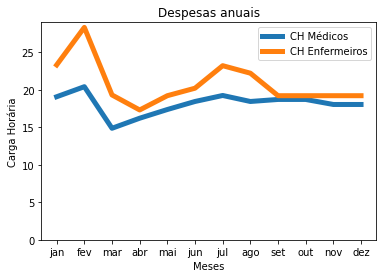

In [ ]:
#gera os graficos de acordo com o ano

def geraGrafico(data):#o parametro 'data' se refere a variavel de cada ano
  meses=data['Competência']
  valoresMed = data['CH Médico']
  valoresEnf = data['CH Enfermeiro']
  plt.plot(meses, valoresMed, meses, valoresEnf, linewidth=5.0)

  plt.legend(['CH Médicos', 'CH Enfermeiros'])
  plt.title('Despesas anuais')
  plt.xlabel('Meses')
  plt.ylabel('Carga Horária')
  plt.ylim(ymin=0)
  plt.show

#EX: de como utilizar a função
geraGrafico(esf['esf14'])#nesse vai gerar uma visualização para o ano de 2014. Para ver de outros anos apenas alterar o 15 dentro das chaves.

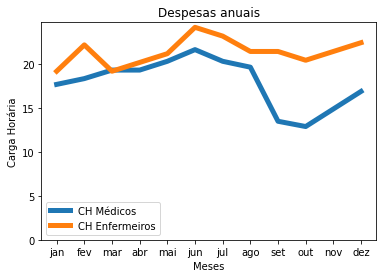

In [ ]:
geraGrafico(esf['esf15'])

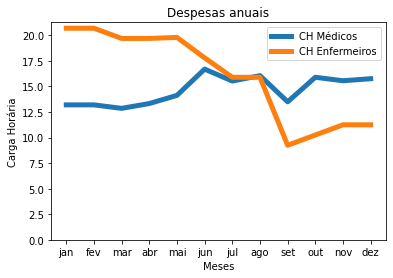

In [ ]:
geraGrafico(esf['esf16'])

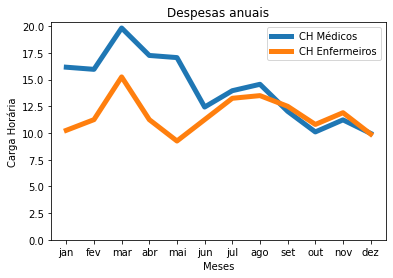

In [ ]:
geraGrafico(esf['esf17'])

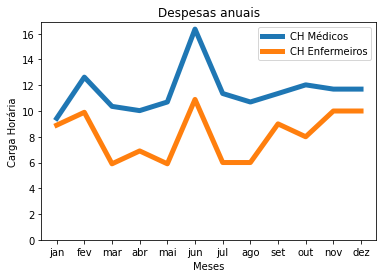

In [ ]:
geraGrafico(esf['esf18'])

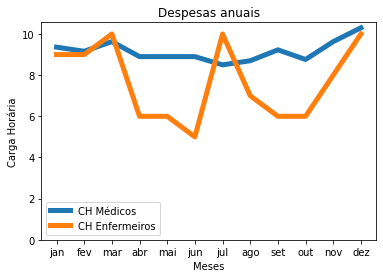

In [ ]:
geraGrafico(esf['esf19'])

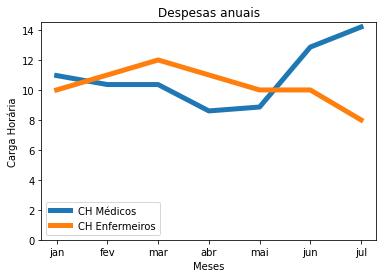

In [ ]:
geraGrafico(esf['esf20'])

In [ ]:
def geraVisualizacao(data):#passar a váriavel como data
  meses=data['Competência']
  atenBasica = data['Cobertura AB']*100
  cobESF = data['Cobertura ESF']*100
  plt.plot(meses, atenBasica, meses, cobESF, linewidth=2.0)

  plt.legend(['Atenção Básica', 'Estratégia Saúde da Família'])
  plt.title('Cobertura Atenção Básica e ESF')
  plt.xlabel('Meses')
  plt.ylabel('Porcentagem da Cobertura')
  plt.ylim(ymin=0)
  plt.show

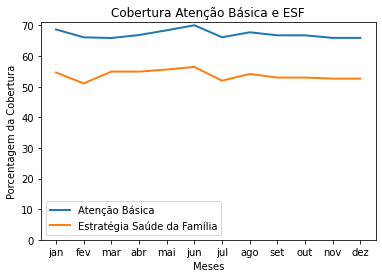

In [ ]:
geraVisualizacao(esf['esf14'])

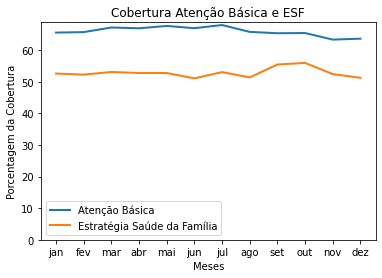

In [ ]:
geraVisualizacao(esf['esf15'])

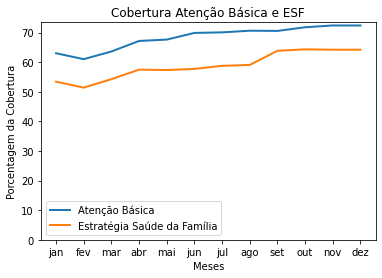

In [ ]:
geraVisualizacao(esf['esf16'])

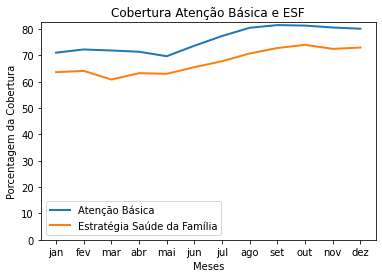

In [ ]:
geraVisualizacao(esf['esf17'])

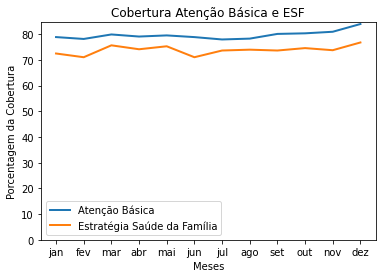

In [ ]:
geraVisualizacao(esf['esf18'])

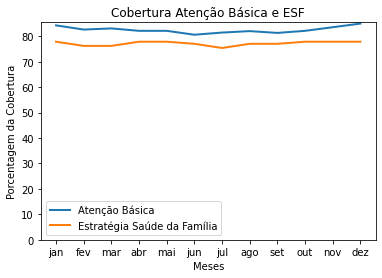

In [ ]:
geraVisualizacao(esf['esf19'])


In [ ]:
esf['esf20']

,Competência,Macrorregião,UF,IBGE,Município,População,Nº ESF Cob.,Nº EAB Param. Cob.,CH Médico,CH Enfermeiro,Nº eSF equivalente,Estim. Pop. Cob. ESF,Cobertura ESF,Estim. Pop. Cob. AB,Cobertura AB
0,jan,SUDESTE,SP,351380.0,DIADEMA,423.884,95.0,0.0,10.96,10.0,10.0,327750.0,0.7732,357750.0,0.8440
1,fev,SUDESTE,SP,351380.0,DIADEMA,423.884,95.0,0.0,10.36,11.0,10.0,327750.0,0.7732,358830.0,0.8465
2,mar,SUDESTE,SP,351380.0,DIADEMA,423.884,95.0,0.0,10.36,12.0,10.0,327750.0,0.7732,358830.0,0.8465
3,abr,SUDESTE,SP,351380.0,DIADEMA,423.884,94.0,0.0,8.60,11.0,9.0,324300.0,0.7651,350100.0,0.8259
4,mai,SUDESTE,SP,351380.0,DIADEMA,423.884,94.0,0.0,8.86,10.0,9.0,324300.0,0.7651,350880.0,0.8278
5,jun,SUDESTE,SP,351380.0,DIADEMA,423.884,94.0,0.0,12.86,10.0,10.0,324300.0,0.7651,354300.0,0.8358
6,jul,SUDESTE,SP,351380.0,DIADEMA,423.884,93.0,0.0,14.20,8.0,8.0,320850.0,0.7569,344850.0,0.8135


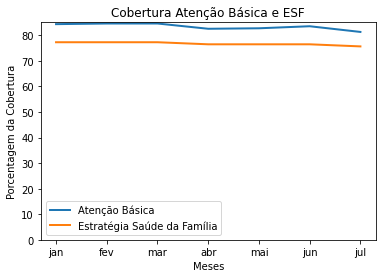

In [ ]:
geraVisualizacao(esf['esf20'])

In [ ]:
def total_Geral_Somado_e_Misturado(data):
  trace1 = go.Bar(x= data['Competência'],
                  y= data['CH Médico'],
                  name= 'Carga Horária Médica ',)

  trace2 = go.Bar(x= data['Competência'],
                  y= data['CH Enfermeiro'],
                  name= 'Carga Horária dos Enfermeiros ',
                  marker = {'color' : '#addbd9'})

  trace3 = go.Bar(x= data['Competência'],
                  y= data['Cobertura AB']*100,
                  name= 'Cobertura atenção básica',
                  marker = {'color' : '#addbb2'})

  trace4 = go.Bar(x= data['Competência'],
                  y= data['Cobertura ESF']*100,
                  name= 'Cobertura estratégia de saúde da família',
                  marker = {'color' : '#e6ab7e'})

  dados= [trace1, trace2, trace3, trace4]
  py.iplot(dados)

In [ ]:
#aqui estou criando uma variavel que concatena os resultados do mês de janeiro para todos os anos
concat = {}
z = pd.DataFrame()
for i2 in range(14,21):
  concat['ano%s' %i2] = esfAno['esf%s' %i2].iloc[0:1]
  z= z.append(concat['ano%s' %i2])
  z['Periodo'] = 'dez de {}'.format(i2)
z

,Competência,Macrorregião,UF,IBGE,Município,População,Nº ESF Cob.,Nº EAB Param. Cob.,CH Médico,CH Enfermeiro,Nº eSF equivalente,Estim. Pop. Cob. ESF,Cobertura ESF,Estim. Pop. Cob. AB,Cobertura AB,Periodo
0,JAN/2014,SUDESTE,SP,351380.0,DIADEMA,406.718,64.0,0.0,19.06,23.30,19.0,222180.000,0.5463,279360,0.6869,dez de 20
0,JAN/2015,SUDESTE,SP,351380.0,DIADEMA,409.613,62.0,0.0,17.70,19.20,18.0,215.453,0.5260,"268.552,50",0.6556,dez de 20
0,JAN/2016,SUDESTE,SP,351380.0,DIADEMA,412.428,64.0,0.0,13.20,20.70,13.0,220.283,0.5341,"259.882,50",0.6301,dez de 20
0,JAN/2017,SUDESTE,SP,351380.0,DIADEMA,415.180,77.0,0.0,16.16,10.25,10.0,264.098,0.6361,"294.847,50",0.7102,dez de 20
0,JAN/2018,SUDESTE,SP,351380.0,DIADEMA,417.869,88.0,0.0,9.43,8.90,9.0,302.910,0.7249,329.610,0.7888,dez de 20
0,JAN/2019,SUDESTE,SP,351380.0,DIADEMA,420.934,95.0,0.0,9.36,9.00,9.0,327750.000,0.7786,354750,0.8428,dez de 20
0,JAN/2020,SUDESTE,SP,351380.0,DIADEMA,423.884,95.0,0.0,10.96,10.00,10.0,327750.000,0.7732,357750,0.8440,dez de 20


In [ ]:
#mesma forma que anteriormente, ao chamar a função definir um ano
total_Geral_Somado_e_Misturado(esf['esf14'])

In [ ]:
total_Geral_Somado_e_Misturado(esf['esf20'])

In [ ]:
#segue o grafico comparando todos os anos no mês de Janeiro
total_Geral_Somado_e_Misturado(z)

# EPIDEMIOLOGIA

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

*Texto em itálico*###TUBERCULOSE

In [ ]:
tuberculose = pd.read_csv("/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Relatorio.tubecolose.Diadema - 2014-2019.csv",sep=";",encoding="latin1", header= 4)
tuberculose = tuberculose.drop(tuberculose.index[2:7])
tuberculose.index.name = 'Casos Confirmados de Tubercolose'
tuberculose 

,Ano Diagnóstico,2014,2015,2016,2017,2018,2019,Totais
Casos Confirmados de Tubercolose,,,,,,,,
0,Numeros,180.0,168.0,151.0,167.0,191.0,180.0,1037.0
1,Sub -Total,180.0,168.0,151.0,167.0,191.0,180.0,1037.0


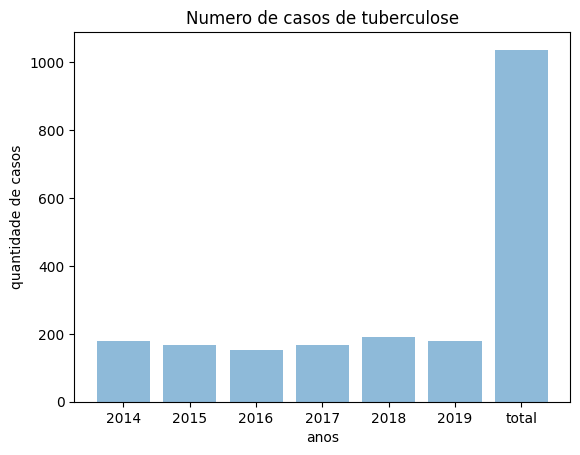

In [ ]:


objects = [2014, 2015, 2016, 2017, 2018, 2019, 'total']
y_pos = np.arange(len(objects))
performance = [180.0,	168.0,	151.0,	167.0,	191.0	,180.0,	1037.0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('quantidade de casos')
plt.xlabel('anos')
plt.title('Numero de casos de tuberculose')

plt.show()

###INTERNAÇÕES POR ANO

In [ ]:
internacao = pd.read_csv("/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Internações por ano.csv",sep=";",encoding="latin1", header= 4)
internacao = internacao.drop(internacao.index[22:34])
mortes1 = pd.read_csv("/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Obitos.csv",sep=";",encoding="latin1", header= 3)
internacao

,Capítulo CID-10,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,I. Algumas doenças infecciosas e parasitárias,109,1160.0,1128.0,1184,1093,1272,1345,1798,9089.0
1,II. Neoplasias (tumores),82,1524.0,1516.0,1497,1443,1434,1585,918,9999.0
2,III. Doenças sangue órgãos hemat e transt imun...,25,162.0,159.0,248,232,255,242,89,1412.0
3,IV. Doenças endócrinas nutricionais e metaból...,38,261.0,302.0,309,345,382,358,242,2237.0
4,V. Transtornos mentais e comportamentais,53,718.0,514.0,566,704,655,1090,490,4790.0
5,VI. Doenças do sistema nervoso,51,493.0,472.0,524,553,587,552,305,3537.0
6,VII. Doenças do olho e anexos,6,541.0,525.0,619,885,710,530,199,4015.0
7,VIII.Doenças do ouvido e da apófise mastóide,2,94.0,77.0,66,65,74,100,34,512.0
8,IX. Doenças do aparelho circulatório,213,2545.0,2395.0,2634,2681,2565,2590,1495,17118.0
9,X. Doenças do aparelho respiratório,266,3038.0,3018.0,3030,3041,3060,3006,1679,20138.0


In [ ]:
total_internacao(14,8,9,5)

In [ ]:
#ao chamar essa função é preciso passar 4 parametros, esses parametros correspondem ao index na tabela acima. Ex: (0,3,4,8) o index 0 vai chamar os valores de "I. Algumas doenças infecciosas e parasitárias"
def total_internacao(doenca1, doenca2, doenca3, doenca4):
  trace1 = go.Bar(x= mortes1.iloc[0][2:10],
                  y= internacao.iloc[doenca1][1:10],
                  name= str(internacao.iloc[doenca1][0:1]),)

  trace2 = go.Bar(x= mortes1.iloc[0][2:10],
                  y= internacao.iloc[doenca2][1:10],
                  name= str(internacao.iloc[doenca2][0:1]),
                  marker = {'color' : '#addbd9'})

  trace3 = go.Bar(x= mortes1.iloc[0][2:10],
                  y= internacao.iloc[doenca3][1:10],
                  name= str(internacao.iloc[doenca3][0:1]),
                  marker = {'color' : '#addbb2'})

  trace4 = go.Bar(x= mortes1.iloc[0][2:10],
                  y= internacao.iloc[doenca4][1:10],
                  name= str(internacao.iloc[doenca4][0:1]),
                  marker = {'color' : '#e6ab7e'})

  dados= [trace1, trace2, trace3, trace4]
  py.iplot(dados)

In [ ]:
total_internacao(0,2,3,4)

###MORTES POR ANO

In [ ]:
mortes = pd.read_csv("/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Obitos.csv",sep=";",encoding="latin1", header= 4)
mortes1 = pd.read_csv("/content/drive/MyDrive/Data Science/DataAcquisition/Healthcare Dataset/Obitos.csv",sep=";",encoding="latin1", header= 3)
mortes = mortes.drop(mortes.index[19:34])
mortes

,Capítulo CID-10,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,I. Algumas doenças infecciosas e parasitárias,-,19,192,180.0,221.0,208,246,280,367,1713.0
1,II. Neoplasias (tumores),-,13,98,128.0,128.0,148,133,176,108,932.0
2,III. Doenças sangue órgãos hemat e transt imun...,-,1,5,7.0,8.0,5,8,9,5,48.0
3,IV. Doenças endócrinas nutricionais e metaból...,-,3,7,10.0,14.0,16,12,9,10,81.0
4,V. Transtornos mentais e comportamentais,-,1,7,1.0,1.0,-,-,-,1,11.0
5,VI. Doenças do sistema nervoso,-,4,25,14.0,21.0,24,23,10,12,133.0
6,IX. Doenças do aparelho circulatório,1,18,156,190.0,204.0,206,189,232,152,1348.0
7,X. Doenças do aparelho respiratório,-,23,211,226.0,236.0,220,211,188,164,1479.0
8,XI. Doenças do aparelho digestivo,-,10,66,68.0,90.0,85,69,74,58,520.0
9,XII. Doenças da pele e do tecido subcutâneo,-,2,8,9.0,13.0,9,5,4,2,52.0


In [ ]:
total_mortes(7,6,12,5)

In [ ]:
def total_mortes(doenca1, doenca2, doenca3, doenca4):
  trace1 = go.Bar(x= mortes1.iloc[0][1:10],
                  y= mortes.iloc[doenca1][1:10],
                  name= str(mortes.iloc[doenca1][0:1]),)

  trace2 = go.Bar(x= mortes1.iloc[0][1:10],
                  y= mortes.iloc[doenca2][1:10],
                  name= str(mortes.iloc[doenca2][0:1]),
                  marker = {'color' : '#addbd9'})

  trace3 = go.Bar(x= mortes1.iloc[0][1:10],
                  y= mortes.iloc[doenca3][1:10],
                  name= str(mortes.iloc[doenca3][0:1]),
                  marker = {'color' : '#addbb2'})

  trace4 = go.Bar(x= mortes1.iloc[0][1:10],
                  y= mortes.iloc[doenca4][1:10],
                  name= str(mortes.iloc[doenca4][0:1]),
                  marker = {'color' : '#e6ab7e'})

  dados= [trace1, trace2, trace3, trace4]
  py.iplot(dados)

In [ ]:
total_mortes(0,2,3,6)

Apêndice: https://applocal.com.br/empresas/hospitais/diadema/sp  -  Mapeamento de Hospitais.

          https://www.google.com.br/maps  -  Utilizado para pesquisa e mapeamento das unidades Caps.

          http://www.servicos.blog.br/postos-de-saude-sp/postos-de-saude-em-diadema-vil-nogueira-parque-reid-e-outros/  -  Mapeamento das UBSs.   
         

          